In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean

In [ ]:
# --- 1. Pemuatan Data ---
print("--- 1. Pemuatan Data ---")
try:
    df = pd.read_csv('diskuk-od_17372_proyeksi_jml_ush_mikro_kecil_menengah_umkm__kabupa_v1_data.csv')
    print("Data berhasil dimuat.")
    print("Bentuk data:", df.shape)
    print("\n5 baris pertama data:")
    print(df.head())
except FileNotFoundError:
    print("Error: File 'diskuk-od_17372_proyeksi_jml_ush_mikro_kecil_menengah_umkm__kabupa_v1_data.csv' tidak ditemukan.")
    print("Pastikan file CSV berada di direktori yang sama dengan script ini.")
    exit()

--- 1. Pemuatan Data ---
Data berhasil dimuat.
Bentuk data: (216, 8)

5 baris pertama data:
   id  kode_provinsi nama_provinsi  kode_kabupaten_kota nama_kabupaten_kota  \
0   1             32    JAWA BARAT                 3201     KABUPATEN BOGOR   
1   2             32    JAWA BARAT                 3202  KABUPATEN SUKABUMI   
2   3             32    JAWA BARAT                 3203   KABUPATEN CIANJUR   
3   4             32    JAWA BARAT                 3204   KABUPATEN BANDUNG   
4   5             32    JAWA BARAT                 3205     KABUPATEN GARUT   

   proyeksi_jumlah_umkm satuan  tahun  
0                375048   UNIT   2016  
1                269002   UNIT   2016  
2                250808   UNIT   2016  
3                353277   UNIT   2016  
4                259141   UNIT   2016  


In [ ]:
# --- 2. Pra-pemrosesan Data ---
print("\n--- 2. Pra-pemrosesan Data ---")

# Agregasi data: Hitung rata-rata proyeksi_jumlah_umkm per kabupaten/kota
df_agg = df.groupby('nama_kabupaten_kota')['proyeksi_jumlah_umkm'].mean().reset_index()
df_agg.rename(columns={'proyeksi_jumlah_umkm': 'rata_rata_proyeksi_umkm'}, inplace=True)
print("\nData setelah agregasi (rata-rata proyeksi UMKM per wilayah):")
print(df_agg.head())
print(f"Jumlah wilayah unik: {len(df_agg)}")


--- 2. Pra-pemrosesan Data ---

Data setelah agregasi (rata-rata proyeksi UMKM per wilayah):
       nama_kabupaten_kota  rata_rata_proyeksi_umkm
0        KABUPATEN BANDUNG               440016.750
1  KABUPATEN BANDUNG BARAT               194660.000
2         KABUPATEN BEKASI               287769.500
3          KABUPATEN BOGOR               467133.000
4         KABUPATEN CIAMIS               174024.125
Jumlah wilayah unik: 27


In [ ]:
# Pemeriksaan nilai hilang (seharusnya tidak ada setelah agregasi ini)
print("\nPengecekan nilai hilang setelah agregasi:")
print(df_agg.isnull().sum())


Pengecekan nilai hilang setelah agregasi:
nama_kabupaten_kota        0
rata_rata_proyeksi_umkm    0
dtype: int64


In [ ]:
# Analisis Data Eksploratif (EDA) - Statistik Deskriptif
print("\nStatistik Deskriptif untuk 'rata_rata_proyeksi_umkm':")
print(df_agg['rata_rata_proyeksi_umkm'].describe())


Statistik Deskriptif untuk 'rata_rata_proyeksi_umkm':
count        27.000000
mean     213806.851852
std      123547.418965
min       32254.250000
25%      111075.562500
50%      202258.875000
75%      301675.625000
max      467133.000000
Name: rata_rata_proyeksi_umkm, dtype: float64


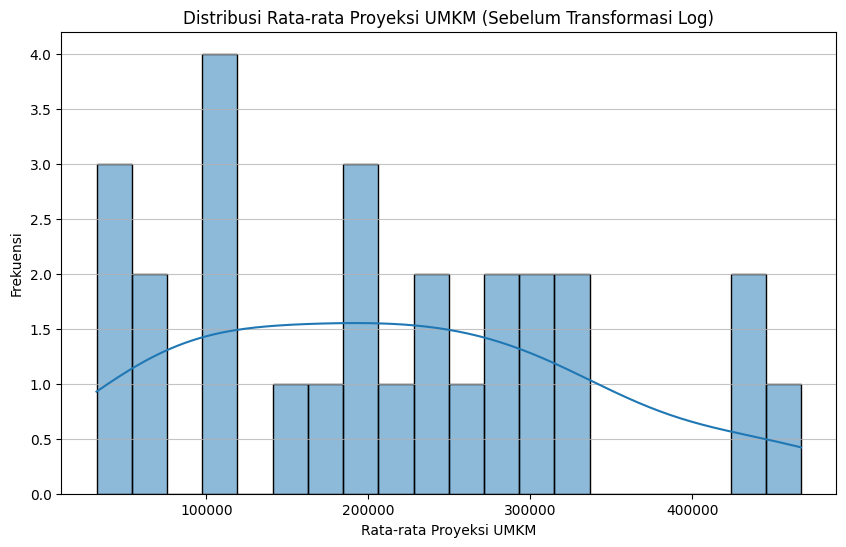

In [ ]:
# Visualisasi distribusi sebelum transformasi
plt.figure(figsize=(10, 6))
sns.histplot(df_agg['rata_rata_proyeksi_umkm'], kde=True, bins=20)
plt.title('Distribusi Rata-rata Proyeksi UMKM (Sebelum Transformasi Log)')
plt.xlabel('Rata-rata Proyeksi UMKM')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Transformasi Logaritmik untuk mengurangi kemiringan
# Tambahkan sedikit nilai untuk menghindari log(0) jika ada, meskipun di sini tidak ada
df_agg['log_rata_rata_proyeksi_umkm'] = np.log(df_agg['rata_rata_proyeksi_umkm'] + 1) # +1 untuk menangani nilai 0 jika ada
print("\nData setelah transformasi logaritmik:")
print(df_agg.head())


Data setelah transformasi logaritmik:
       nama_kabupaten_kota  rata_rata_proyeksi_umkm  \
0        KABUPATEN BANDUNG               440016.750   
1  KABUPATEN BANDUNG BARAT               194660.000   
2         KABUPATEN BEKASI               287769.500   
3          KABUPATEN BOGOR               467133.000   
4         KABUPATEN CIAMIS               174024.125   

   log_rata_rata_proyeksi_umkm  
0                    12.994570  
1                    12.179015  
2                    12.569919  
3                    13.054371  
4                    12.066955  


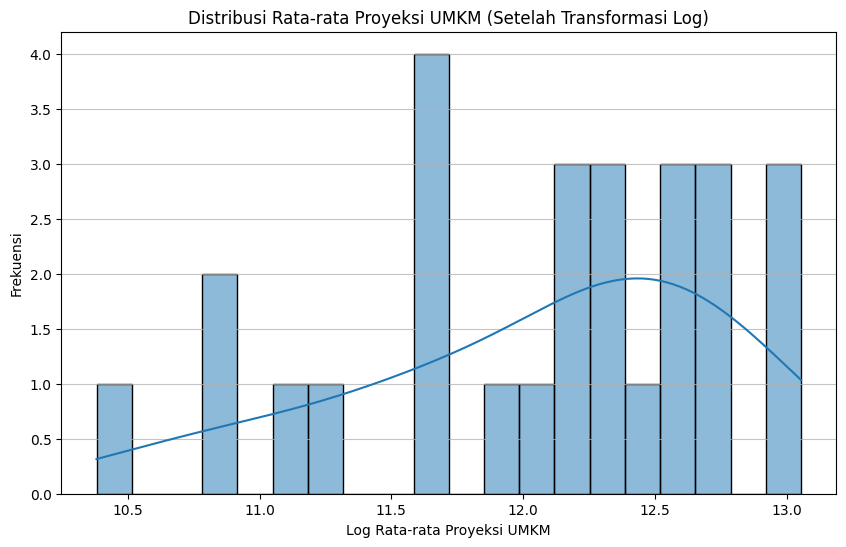

In [ ]:
# Visualisasi distribusi setelah transformasi log
plt.figure(figsize=(10, 6))
sns.histplot(df_agg['log_rata_rata_proyeksi_umkm'], kde=True, bins=20)
plt.title('Distribusi Rata-rata Proyeksi UMKM (Setelah Transformasi Log)')
plt.xlabel('Log Rata-rata Proyeksi UMKM')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Penskalaan Fitur (Standardisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_agg[['log_rata_rata_proyeksi_umkm']])
df_agg['scaled_log_rata_rata_proyeksi_umkm'] = X_scaled
print("\nData setelah penskalaan (standardisasi):")
print(df_agg.head())
print(f"Rata-rata data berskala: {X_scaled.mean():.2f}")
print(f"Standar deviasi data berskala: {X_scaled.std():.2f}")


Data setelah penskalaan (standardisasi):
       nama_kabupaten_kota  rata_rata_proyeksi_umkm  \
0        KABUPATEN BANDUNG               440016.750   
1  KABUPATEN BANDUNG BARAT               194660.000   
2         KABUPATEN BEKASI               287769.500   
3          KABUPATEN BOGOR               467133.000   
4         KABUPATEN CIAMIS               174024.125   

   log_rata_rata_proyeksi_umkm  scaled_log_rata_rata_proyeksi_umkm  
0                    12.994570                            1.319880  
1                    12.179015                            0.160884  
2                    12.569919                            0.716402  
3                    13.054371                            1.404864  
4                    12.066955                            0.001635  
Rata-rata data berskala: 0.00
Standar deviasi data berskala: 1.00


In [ ]:
# --- 3. Penentuan Jumlah Klaster Optimal (Metode Elbow & Silhouette Score) ---
print("\n--- 3. Penentuan Jumlah Klaster Optimal ---")

wcss = []
silhouette_scores = []
k_range = range(2, 11) # Mulai dari 2 karena Silhouette Score tidak terdefinisi untuk k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # n_init='auto' (default) menjalankan K-Means beberapa kali
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K = {k}, WCSS = {kmeans.inertia_:.2f}, Silhouette Score = {score:.2f}")


--- 3. Penentuan Jumlah Klaster Optimal ---
K = 2, WCSS = 7.19, Silhouette Score = 0.63
K = 3, WCSS = 4.46, Silhouette Score = 0.53
K = 4, WCSS = 1.84, Silhouette Score = 0.58
K = 5, WCSS = 1.17, Silhouette Score = 0.61
K = 6, WCSS = 0.64, Silhouette Score = 0.66
K = 7, WCSS = 0.39, Silhouette Score = 0.68
K = 8, WCSS = 0.21, Silhouette Score = 0.69
K = 9, WCSS = 0.11, Silhouette Score = 0.67
K = 10, WCSS = 0.08, Silhouette Score = 0.67


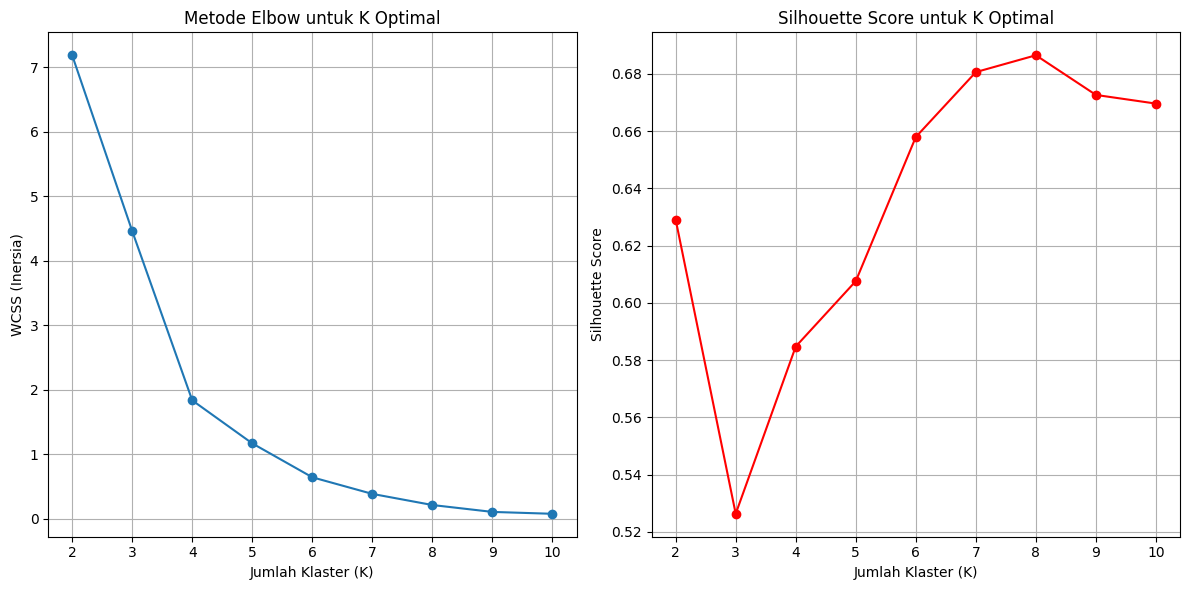

In [ ]:
# Plot Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('Metode Elbow untuk K Optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('WCSS (Inersia)')
plt.xticks(k_range)
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score untuk K Optimal')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Berdasarkan plot, k=3 adalah pilihan yang baik (titik siku dan skor silhouette yang relatif tinggi)
optimal_k = 3
print(f"\nJumlah klaster optimal yang dipilih: {optimal_k}")


Jumlah klaster optimal yang dipilih: 3


In [ ]:
# --- 4. Implementasi K-Means Clustering ---
print(f"\n--- 4. Implementasi K-Means Clustering dengan K={optimal_k} ---")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df_agg['cluster'] = kmeans_final.fit_predict(X_scaled)


--- 4. Implementasi K-Means Clustering dengan K=3 ---


In [ ]:
# Mendapatkan centroid dalam skala asli
# Invers transformasi penskalaan
scaled_centroids = kmeans_final.cluster_centers_
log_original_centroids = scaler.inverse_transform(scaled_centroids)
original_centroids = np.exp(log_original_centroids) - 1 # Invers transformasi log

print("\nCentroid Klaster Akhir (dalam skala asli, rata-rata proyeksi UMKM):")
for i, centroid in enumerate(original_centroids):
    print(f"Klaster {i}: {centroid[0]:,.0f} unit UMKM")

print("\nRingkasan Penugasan Klaster:")
print(df_agg['cluster'].value_counts().sort_index())


Centroid Klaster Akhir (dalam skala asli, rata-rata proyeksi UMKM):
Klaster 0: 74,080 unit UMKM
Klaster 1: 349,776 unit UMKM
Klaster 2: 202,693 unit UMKM

Ringkasan Penugasan Klaster:
cluster
0    9
1    9
2    9
Name: count, dtype: int64


In [ ]:
# Menambahkan rata-rata proyeksi UMKM per klaster ke DataFrame untuk interpretasi
cluster_summary = df_agg.groupby('cluster')['rata_rata_proyeksi_umkm'].agg(['mean', 'count']).reset_index()
cluster_summary.rename(columns={'mean': 'Rata-rata Proyeksi UMKM (Unit)', 'count': 'Jumlah Wilayah'}, inplace=True)
print("\nTabel Karakteristik Klaster UMKM:")
print(cluster_summary.sort_values(by='Rata-rata Proyeksi UMKM (Unit)', ascending=False).to_string(index=False))


Tabel Karakteristik Klaster UMKM:
 cluster  Rata-rata Proyeksi UMKM (Unit)  Jumlah Wilayah
       1                   355455.305556               9
       2                   205288.902778               9
       0                    80676.347222               9


In [ ]:
# Mengurutkan klaster berdasarkan rata-rata proyeksi UMKM untuk penamaan yang konsisten
# Ini penting agar Klaster 0 selalu yang tertinggi, Klaster 1 sedang, dst.
sorted_clusters = cluster_summary.sort_values(by='Rata-rata Proyeksi UMKM (Unit)', ascending=False)['cluster'].tolist()
cluster_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted_clusters)}
df_agg['cluster_sorted'] = df_agg['cluster'].map(cluster_mapping)

In [ ]:
# Perbarui centroid dan ringkasan dengan label klaster yang diurutkan
kmeans_final.cluster_centers_ = kmeans_final.cluster_centers_[sorted_clusters]
original_centroids_sorted = np.exp(scaler.inverse_transform(kmeans_final.cluster_centers_)) - 1

print("\nCentroid Klaster Akhir (dalam skala asli, setelah pengurutan):")
for i, centroid in enumerate(original_centroids_sorted):
    print(f"Klaster {i}: {centroid[0]:,.0f} unit UMKM")

cluster_summary_sorted = df_agg.groupby('cluster_sorted')['rata_rata_proyeksi_umkm'].agg(['mean', 'count']).reset_index()
cluster_summary_sorted.rename(columns={'mean': 'Rata-rata Proyeksi UMKM (Unit)', 'count': 'Jumlah Wilayah'}, inplace=True)
print("\nTabel Karakteristik Klaster UMKM (setelah pengurutan):")
print(cluster_summary_sorted.sort_values(by='Rata-rata Proyeksi UMKM (Unit)', ascending=False).to_string(index=False))


Centroid Klaster Akhir (dalam skala asli, setelah pengurutan):
Klaster 0: 349,776 unit UMKM
Klaster 1: 202,693 unit UMKM
Klaster 2: 74,080 unit UMKM

Tabel Karakteristik Klaster UMKM (setelah pengurutan):
 cluster_sorted  Rata-rata Proyeksi UMKM (Unit)  Jumlah Wilayah
              0                   355455.305556               9
              1                   205288.902778               9
              2                    80676.347222               9


In [ ]:
# Menampilkan beberapa contoh wilayah per klaster
print("\nContoh wilayah per klaster:")
for i in range(optimal_k):
    cluster_members = df_agg[df_agg['cluster_sorted'] == i]['nama_kabupaten_kota'].tolist()
    print(f"Klaster {i} (Rata-rata UMKM: {original_centroids_sorted[i][0]:,.0f}): {', '.join(cluster_members[:5])}{'...' if len(cluster_members) > 5 else ''}")


Contoh wilayah per klaster:
Klaster 0 (Rata-rata UMKM: 349,776): KABUPATEN BANDUNG, KABUPATEN BEKASI, KABUPATEN BOGOR, KABUPATEN CIANJUR, KABUPATEN CIREBON...
Klaster 1 (Rata-rata UMKM: 202,693): KABUPATEN BANDUNG BARAT, KABUPATEN CIAMIS, KABUPATEN INDRAMAYU, KABUPATEN MAJALENGKA, KABUPATEN SUBANG...
Klaster 2 (Rata-rata UMKM: 74,080): KABUPATEN KUNINGAN, KABUPATEN PANGANDARAN, KABUPATEN PURWAKARTA, KOTA BANJAR, KOTA BOGOR...



--- 5. Visualisasi Klaster ---


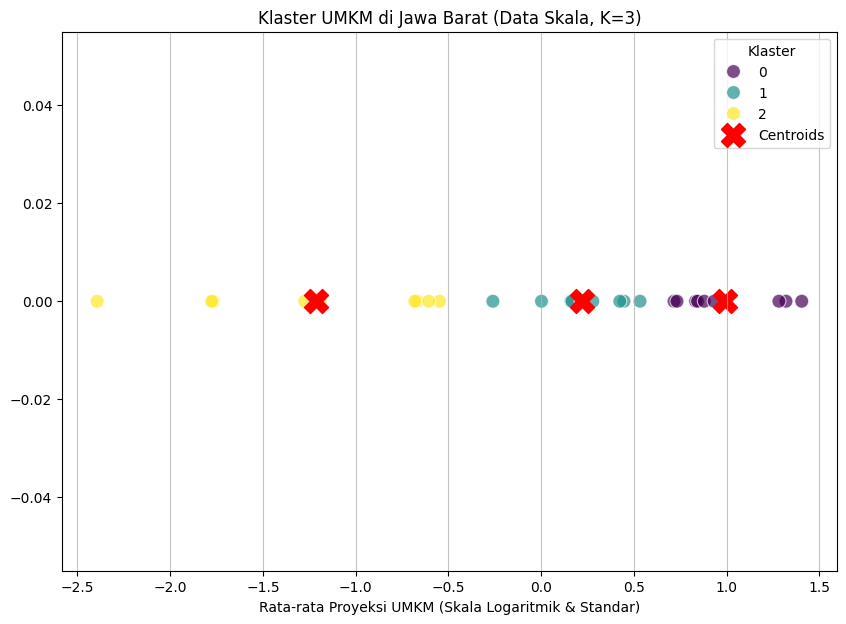

In [ ]:
# --- 5. Visualisasi Klaster ---
print("\n--- 5. Visualisasi Klaster ---")

# Visualisasi klaster pada data yang diskalakan
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_agg['scaled_log_rata_rata_proyeksi_umkm'], y=np.zeros_like(df_agg['scaled_log_rata_rata_proyeksi_umkm']),
                hue=df_agg['cluster_sorted'], palette='viridis', s=100, alpha=0.7, legend='full')
plt.scatter(kmeans_final.cluster_centers_, np.zeros(optimal_k), marker='X', s=300, color='red', label='Centroids')
plt.title(f'Klaster UMKM di Jawa Barat (Data Skala, K={optimal_k})')
plt.xlabel('Rata-rata Proyeksi UMKM (Skala Logaritmik & Standar)')
plt.yticks() # Sembunyikan sumbu Y karena ini adalah plot 1D
plt.legend(title='Klaster')
plt.grid(axis='x', alpha=0.75)
plt.show()

/tmp/ipython-input-26-2472479698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_sorted', y='rata_rata_proyeksi_umkm', data=df_agg, palette='viridis')


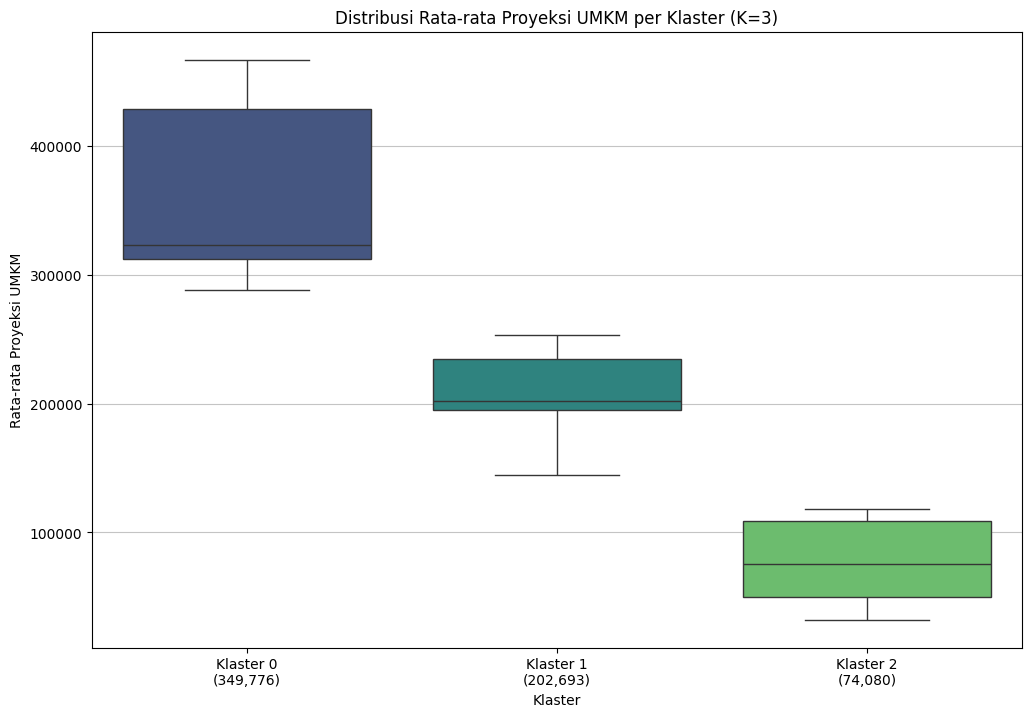

In [ ]:
# Visualisasi klaster pada data asli (rata-rata proyeksi UMKM)
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster_sorted', y='rata_rata_proyeksi_umkm', data=df_agg, palette='viridis')
plt.title(f'Distribusi Rata-rata Proyeksi UMKM per Klaster (K={optimal_k})')
plt.xlabel('Klaster')
plt.ylabel('Rata-rata Proyeksi UMKM')
plt.xticks(ticks=range(optimal_k), labels=[f'Klaster {i}\n({original_centroids_sorted[i][0]:,.0f})' for i in range(optimal_k)])
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# --- 6. Perhitungan Manual K-Means (Demonstrasi) ---
print("\n--- 6. Perhitungan Manual K-Means (Demonstrasi) ---")

# Pilih subset kecil dari data yang sudah diskalakan
# Ambil 5 baris pertama dari data yang sudah diskalakan
manual_data = df_agg[['nama_kabupaten_kota', 'scaled_log_rata_rata_proyeksi_umkm']].head(5).copy()
print("\nSubset Data Terpilih untuk Perhitungan Manual:")
print(manual_data.to_string(index=False))


--- 6. Perhitungan Manual K-Means (Demonstrasi) ---

Subset Data Terpilih untuk Perhitungan Manual:
    nama_kabupaten_kota  scaled_log_rata_rata_proyeksi_umkm
      KABUPATEN BANDUNG                            1.319880
KABUPATEN BANDUNG BARAT                            0.160884
       KABUPATEN BEKASI                            0.716402
        KABUPATEN BOGOR                            1.404864
       KABUPATEN CIAMIS                            0.001635


In [ ]:
# Untuk demonstrasi, kita akan menggunakan k=2
k_manual = 2

# Inisialisasi Centroid Awal secara manual (misal, ambil 2 titik pertama sebagai centroid)
# Atau bisa juga memilih secara acak dari rentang data
initial_centroids_manual = np.array([
    manual_data['scaled_log_rata_rata_proyeksi_umkm'].iloc[0],
    manual_data['scaled_log_rata_rata_proyeksi_umkm'].iloc[1]
]).reshape(-1, 1)

print(f"\nCentroid Awal (untuk k={k_manual}):")
for i, c in enumerate(initial_centroids_manual):
    print(f"Centroid {i+1}: {c[0]:.4f}")


Centroid Awal (untuk k=2):
Centroid 1: 1.3199
Centroid 2: 0.1609


In [ ]:
# Fungsi untuk menghitung jarak Euclidean
def calculate_distance(point, centroid):
    return euclidean(point, centroid)

def assign_to_clusters(data, centroids):
    assignments = []
    distances_matrix = []
    for i, row in data.iterrows():
        point = np.array([row['scaled_log_rata_rata_proyeksi_umkm']])
        distances = [calculate_distance(point, c) for c in centroids]
        assigned_cluster = np.argmin(distances)
        assignments.append(assigned_cluster)
        distances_matrix.append(distances)
    return assignments, distances_matrix

def update_centroids(data, assignments, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[np.array(assignments) == i]['scaled_log_rata_rata_proyeksi_umkm']
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean())
        else:
            # Jika klaster kosong, biarkan centroid di posisi sebelumnya atau inisialisasi ulang
            new_centroids.append(initial_centroids_manual[i][0]) # Contoh: gunakan centroid awal
    return np.array(new_centroids).reshape(-1, 1)

In [ ]:
# Iterasi Pertama
print("\n--- Iterasi 1 ---")
manual_data['cluster_manual_iter1'], distances_iter1 = assign_to_clusters(manual_data, initial_centroids_manual)

manual_table_iter1 = manual_data.copy()
manual_table_iter1['Jarak ke C1'] = [d[0] for d in distances_iter1]
manual_table_iter1['Jarak ke C2'] = [d[1] for d in distances_iter1]
manual_table_iter1.rename(columns={'cluster_manual_iter1': 'Penugasan Klaster'}, inplace=True)
print(manual_table_iter1[['nama_kabupaten_kota', 'scaled_log_rata_rata_proyeksi_umkm', 'Jarak ke C1', 'Jarak ke C2', 'Penugasan Klaster']].to_string(index=False))

new_centroids_iter1 = update_centroids(manual_data, manual_data['cluster_manual_iter1'], k_manual)
print("\nCentroid Baru Setelah Iterasi 1:")
for i, c in enumerate(new_centroids_iter1):
    print(f"Centroid {i+1}: {c[0]:.4f}")
print("\n--- Iterasi 2 ---")
manual_data['cluster_manual_iter2'], distances_iter2 = assign_to_clusters(manual_data, new_centroids_iter1)


--- Iterasi 1 ---
    nama_kabupaten_kota  scaled_log_rata_rata_proyeksi_umkm  Jarak ke C1  Jarak ke C2  Penugasan Klaster
      KABUPATEN BANDUNG                            1.319880     0.000000     1.158996                  0
KABUPATEN BANDUNG BARAT                            0.160884     1.158996     0.000000                  1
       KABUPATEN BEKASI                            0.716402     0.603478     0.555518                  1
        KABUPATEN BOGOR                            1.404864     0.084984     1.243980                  0
       KABUPATEN CIAMIS                            0.001635     1.318245     0.159250                  1

Centroid Baru Setelah Iterasi 1:
Centroid 1: 1.3624
Centroid 2: 0.2930

--- Iterasi 2 ---


In [ ]:
# Iterasi Kedua
print("\n--- Iterasi 2 ---")
manual_data['cluster_manual_iter2'], distances_iter2 = assign_to_clusters(manual_data, new_centroids_iter1)

manual_table_iter2 = manual_data.copy()
manual_table_iter2['Jarak ke C1'] = [d[0] for d in distances_iter2]
manual_table_iter2['Jarak ke C2'] = [d[1] for d in distances_iter2]
manual_table_iter2.rename(columns={'cluster_manual_iter2': 'Penugasan Klaster'}, inplace=True)
print(manual_table_iter2[['nama_kabupaten_kota', 'scaled_log_rata_rata_proyeksi_umkm', 'Jarak ke C1', 'Jarak ke C2', 'Penugasan Klaster']].to_string(index=False))

new_centroids_iter2 = update_centroids(manual_data, manual_data['cluster_manual_iter2'], k_manual)
print("\nCentroid Baru Setelah Iterasi 2:")
for i, c in enumerate(new_centroids_iter2):
    print(f"Centroid {i+1}: {c[0]:.4f}")


--- Iterasi 2 ---
    nama_kabupaten_kota  scaled_log_rata_rata_proyeksi_umkm  Jarak ke C1  Jarak ke C2  Penugasan Klaster
      KABUPATEN BANDUNG                            1.319880     0.042492     1.026906                  0
KABUPATEN BANDUNG BARAT                            0.160884     1.201488     0.132089                  1
       KABUPATEN BEKASI                            0.716402     0.645970     0.423429                  1
        KABUPATEN BOGOR                            1.404864     0.042492     1.111890                  0
       KABUPATEN CIAMIS                            0.001635     1.360737     0.291339                  1

Centroid Baru Setelah Iterasi 2:
Centroid 1: 1.3624
Centroid 2: 0.2930


In [ ]:
# Ambil penugasan klaster otomatis untuk subset manual
manual_data['cluster_python'] = df_agg.loc[manual_data.index, 'cluster_sorted']

print("\nPerbandingan Penugasan Klaster (Subset Data):")
print(manual_data[['nama_kabupaten_kota', 'scaled_log_rata_rata_proyeksi_umkm', 'cluster_manual_iter2', 'cluster_python']].to_string(index=False))


Perbandingan Penugasan Klaster (Subset Data):
    nama_kabupaten_kota  scaled_log_rata_rata_proyeksi_umkm  cluster_manual_iter2  cluster_python
      KABUPATEN BANDUNG                            1.319880                     0               0
KABUPATEN BANDUNG BARAT                            0.160884                     1               1
       KABUPATEN BEKASI                            0.716402                     1               0
        KABUPATEN BOGOR                            1.404864                     0               0
       KABUPATEN CIAMIS                            0.001635                     1               1
